# Modelisations de la distribution des variables magnitudes (class)et profondeur (depth)

## Table of Contents

* [Chargement des librairies necessaires](#chapter1)
* [Import des donneés et Analyse](#chapter2)
* [Modelisation de distributions](#chapter3)
    * [1. Pour toutes les zones ](#section_3_1)
        * [Distributions en intensité](#section_3_1_1)
        * [Distributions en frequence](#section_3_1_1)
    * [2. Par decoupage de zones ](#section_3_2)
        * [Distributions en intensité](#section_3_2_1)
        * [Distributions en frequence](#section_3_2_2)
* [4. Créer des dictionnaires](#chapter4)
* [5. Liste compréhension et dictionnaire compréhension](#chapter5)

## Chargement des librairies necessaires <a class="anchor" id="chapter1"></a>

In [7]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# librairie pour l'estimation des paramètres
import scipy
import scipy.stats

# librairies supplementaires matplotlib (pour les maps)
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon # permet de tracer des polygones sur une map

# library for manipulation and analysis of planar geometric objects
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon as Polygon1

## Import des donneés et Analyse <a class="anchor" id="chapter1"></a>

In [8]:
# Get the data
r = requests.get('https://raw.githubusercontent.com/eupho73/TER-BNN/main/data/data.csv')
# Save the data
with open("eq_data.csv", 'wb') as f:
    f.write(r.content)
    
#open the data   
data=pd.read_csv("eq_data.csv")


In [9]:
print("les dimensions", data.shape) 
data.head()

les dimensions (247474, 12)


,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
0,0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96
1,1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154
2,2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213
3,3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212
4,4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230


In [10]:
data.describe() # Des stats sur les données

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
count,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000
mean,123736.500000,2004.278546,6.365970,15.773956,11.547152,29.452480,29.545738,37.369375,140.592969,44.580025,3.076008,193.379604
std,71439.734596,7.077706,3.299538,8.732712,6.882993,17.323443,17.328707,3.211989,3.603936,64.011168,0.538819,62.174790
min,0.000000,1990.000000,1.000000,1.000000,0.000000,0.000000,0.000000,21.864700,7.987000,0.000000,2.500000,0.000000
25%,61868.250000,1999.000000,3.000000,8.000000,6.000000,14.000000,14.090000,35.060000,139.260000,14.000000,2.700000,155.000000
50%,123736.500000,2005.000000,6.000000,16.000000,12.000000,29.000000,30.000000,37.189600,141.330000,30.000000,2.900000,194.000000
75%,185604.750000,2011.000000,9.000000,23.000000,17.000000,44.000000,45.000000,39.370000,142.529300,47.400000,3.300000,233.000000
max,247473.000000,2016.000000,12.000000,31.000000,23.000000,59.000000,59.099000,77.763000,163.656000,602.500000,9.000000,335.000000


C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'Zone'

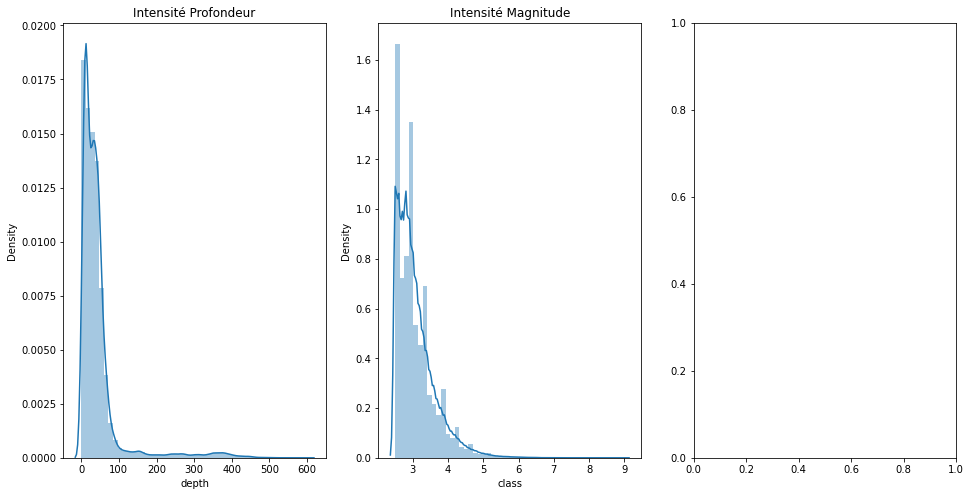

In [11]:
plt.figure(figsize = (16,8))
plt.subplot(131)
sns.distplot(data['depth'])
plt.title("Intensité Profondeur")
plt.subplot(132)
sns.distplot(data['class'])
plt.title("Intensité Magnitude")
plt.subplot(133)
sns.histplot(data["Zone"])
plt.title('Nombre de seisme par zone')
plt.plot()

La 1ère distribution semble avoir une queue significative. \\
La 2 ème distribution montre que une grande part des magnitudes sont entre 1 et 3,5. \\
L'histogramme du troisième graphe montre des des zones qui n'ont aucun EQ. \\



Dans le cadre du pricing d'un cat bond, on va s'interesser aux EQ capable de declencher un sinistre. Ici on choisit ceux dont les magnitudes sont superieurs à 4 en reference à cet échelle. 
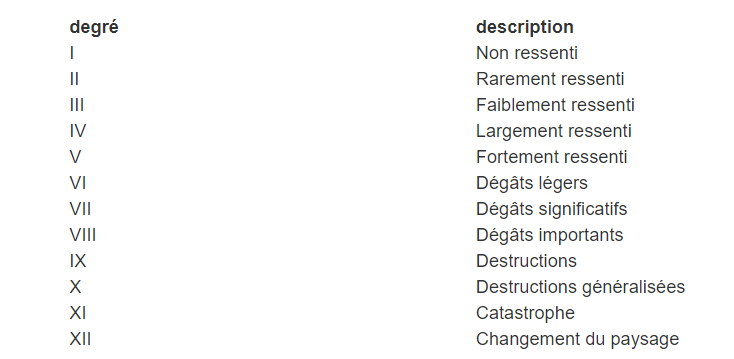

In [374]:
seuil_sinistre = 5
data['claims'] = data['class']>= seuil_sinistre # on definit une variable sinistre
data.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,claims
0,0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,False
1,1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,False
2,2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,False
3,3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,False
4,4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,False


In [375]:
#On encode en binaire la variable claims
data['claims'] = data['claims'].astype('category').cat.codes
data.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,claims
0,0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,0
1,1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,0
2,2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,0
3,3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,0
4,4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,0


# 

In [376]:
# Pour preparer la modelisation des intensités, on va créer à partir des données précedentes une nouvelle base d'observations de sinistres
#df_claims = data.copy()
df_claims = data[data['claims'] == 1] 
print(df_claims.shape)
print("ratio donnée conservé :", (df_claims.shape[0]/ data.shape[0])*100, "%") # On regarde la proportion de données conservées


(2387, 13)
ratio donnée conservé : 0.9645457704647762 %


C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

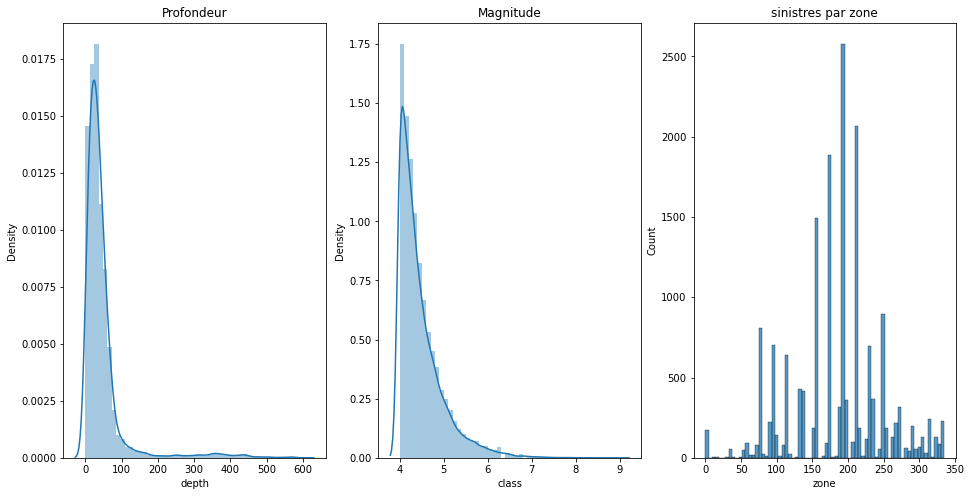

In [15]:
plt.figure(figsize = (16,8))
plt.subplot(131)
sns.distplot(df_claims['depth'])
plt.title("Profondeur")
plt.subplot(132)
sns.distplot(df_claims['class'])
plt.title("Magnitude")
plt.subplot(133)
sns.histplot(df_claims['zone'])
plt.title("sinistres par zone")
plt.plot()

## Modelisation de distributions <a class="anchor" id="chapter3"></a>

### 1. Pour toutes les zones  <a class="anchor" id="section_3_1"></a>

### --> Distributions en intensité <a class="anchor" id="section_3_1_1"></a>

   #### -----> Variable  Depth

On va regarder parmi une liste de lois quelle loi s'y prête mieux à notre jeu de données.

Pour cela on va classer les lois en comparant les residus carré entre leurs distributions et la distribution de nos données.

Par exemple pour la variable depth, on aura:

In [16]:

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']


sum_square_error = []
p_value=[]

for distribution in dist_names:
    y, x= np.histogram(df_claims['depth'], bins=500, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
######## méthode fit
    dist = getattr(scipy.stats, distribution)
    parameters = dist.fit(df_claims['depth'])
    
######## paramètres
    loc = parameters[-2]
    scale = parameters[-1]
    arg = parameters[:-2]
    
######## Calcul de Sum square error
    pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
    sse = np.sum( (y - pdf)**2 )
    sum_square_error.append(sse)
    
######## Calcul de p_value
    p= scipy.stats.kstest(df_claims['depth'], distribution, parameters)[1]
    p_value.append(p)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['Résidus au carré'] = sum_square_error
results['p_value'] = p_value
results.sort_values(['Résidus au carré'], inplace=True, ascending=True)
###### rapport
print ('Classement des lois pour la variable depth:')
results



C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Classement des lois pour la variable depth:


,Distribution,Résidus au carré,p_value
6,invgamma,0.002438,8.178934e-38
5,lognorm,0.002554,2.758860e-59
4,t,0.002668,1.202582e-227
7,invgauss,0.002729,5.216614e-111
1,beta,0.003495,2.428237e-181
11,chi2,0.003569,2.344173e-203
10,chi,0.003946,0.000000e+00
9,alpha,0.004403,1.073952e-274
0,norm,0.006567,0.000000e+00
8,loggamma,0.006690,0.000000e+00


L'inverse de la loi gamma semble le mieux approprié pour la distribution de la variable depth

**Mieux, on va definir une fonction pour la suite qui nous renvoie directement la loi qui s'approche le mieux de la distribution de notre donnée ainsi que les estimations des paramètres associés**

In [17]:

def estim_best_loi(data, sse_thr = 0.000005):
    # sse_thr = seuil d'acceptation du best
    sse = np.inf
          
    ### Histogramme des données
    y, x = np.histogram(data, bins=50, density=True)
    # Milieu de chaque classe
    x = (x + np.roll(x, -1))[:-1] / 2.0


    # Pour chaque distribution
    for name in dist_names:

        # Modéliser
        dist = getattr(scipy.stats, name)
        param = dist.fit(data)

        # Paramètres
        loc = param[-2]
        scale = param[-1]
        arg = param[:-2]

        # PDF
        pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
        # SSE
        model_sse = np.sum((y - pdf)**2)

        # Si le SSE est ddiminué, enregistrer la loi
        if model_sse < sse :
            best_pdf = pdf
            sse = model_sse
            best_loc = loc
            best_scale = scale
            best_arg = arg
            best_name = name

        # Si en dessous du seuil, quitter la boucle
        if model_sse < sse_thr :
            break
            
    ### Affichage de la meilleure loi avec paramètre associé
    
    plt.figure(figsize=(12,8))
    plt.plot(x, y, label="Données")
    plt.plot(x, best_pdf, label=best_name, linewidth=3)
    plt.title("{}".format(pd.DataFrame(data).columns))
    plt.legend(loc='upper right')
    plt.show()

    # Détails sur la loi sélectionnée
    print("Selected Model : ", best_name)
    print("Loc. param. : ", best_loc)
    print("Scale param. : ", best_scale)
    print("Other arguments : ", best_arg)
    print("SSE : ", sse)
    
    return [best_name, best_loc, best_scale, best_arg, sse]


C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


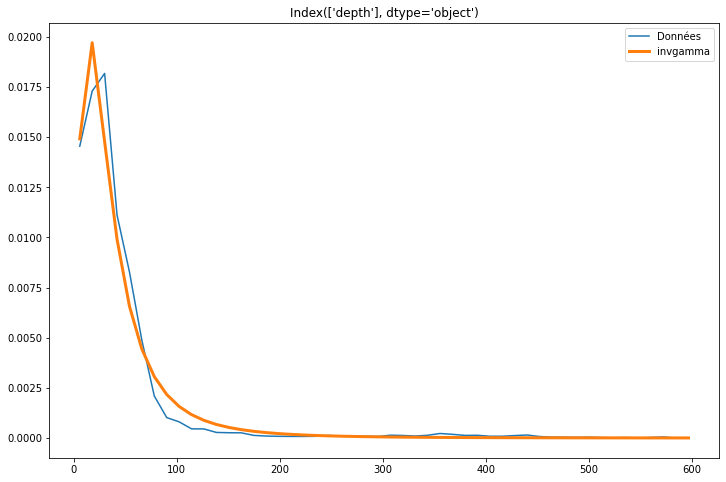

Selected Model :  invgamma
Loc. param. :  -14.268324246002095
Scale param. :  116.88897527429523
Other arguments :  (3.0059872179983165,)
SSE :  2.6120271687709735e-05


In [18]:
#Modelling Intensity depth for all area
params_depth = estim_best_loi(df_claims['depth']) # pour la variable profondeur

L'inverse de la loi gamma inverse semble mieux être adapter à la distribution en intensité de la variable depth. Les paramètres estimés associés à cette loi sont dans la liste params_depth.



#### ----> Variable Class

C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\khali\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


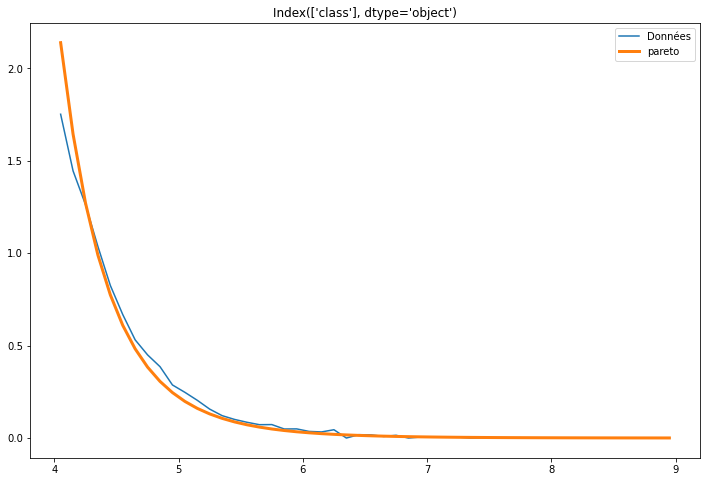

Selected Model :  pareto
Loc. param. :  0.011219820826615497
Scale param. :  3.988780179130191
Other arguments :  (9.752587056801136,)
SSE :  0.22021434989013697


In [20]:
params_class =estim_best_loi(df_claims['class']) # pour la variable magnitude

La loi de pareto remporte la course. Elle s'adapte bien à la distribution.

## Modelisation de la fréquence

In [23]:
# On s'intéresse à la frequence des sinistres par année
df_gr = df_claims.groupby(['year']).count()
df_gr.rename({"class":"freq"},axis=1,inplace=True)

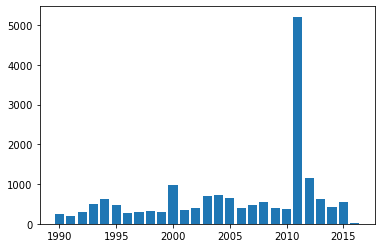

In [24]:
plt.bar(df_gr.index,height=df_gr.freq)
plt.show()

In [26]:
# Estimation du paramètre mu de la loi de poisson. On utilise l'estimateur empirique qui est l'estimateur du max de vraissemblance
mu = np.mean(df_gr.freq)

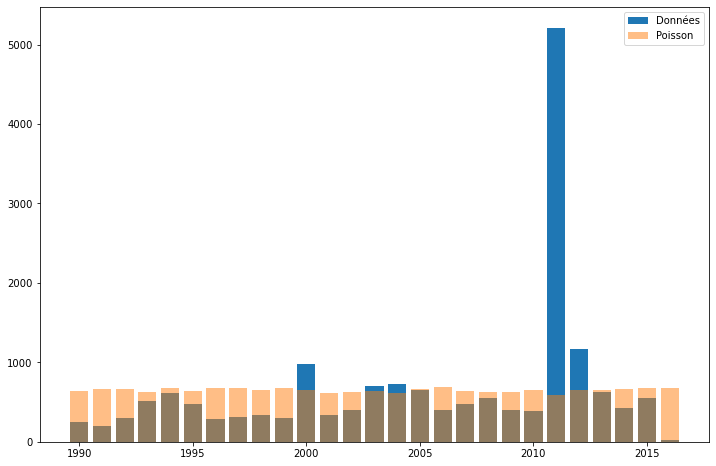

In [27]:
#Inès
pmf=scipy.stats.poisson.rvs(mu=np.mean(df_gr.freq),size=len(df_gr.index))
plt.figure(figsize=(12,8))
plt.bar(df_gr.index,height=df_gr.freq,label="Données")
plt.bar(df_gr.index, pmf, label="Poisson",alpha=0.5)
plt.legend(loc='upper right')
plt.show()


Le modèle de poisson n'arrive pas à capter toutes les variations de notre distribution. Des explications seraient :
    *la loi de poisson a la moyenne et la variance constante et égale, donc de ce fait, elle devient inadaptée à notre jeu de donnée (1)
    *Le groupement par année est trop groteste(2)
    *Le paramètre mu n'est pas constant au cours du temps(3)
    *Le paramètre varie en fonction des zones(4)
Si nous supposons que la loi de poisson est adapté mais qu'il faut un bon calibrage du paramètre, alors nous pourrions legitimement se concentrer sur l'impact des hypothèses 3 et 4, car le processus de poisson est un processus continu.
Nous commencerons par analyser l'influence des zones sur l'estimation du paramètre mu

## --> Modelisations par groupe de zones <a class="anchor" id="section_3_1_2"></a>

On va regrouper nos données initiales par zone. On suppose que le paramètre du modèle à estimer est constant sur toute la periode considerée. Ce qui n'est pas forcement pertinent mais on y reviendra plus tard.

### -----> Formation de groupes

In [579]:
# On va regarder les zones qu'on a 
np.sort(df_claims['zone'].unique())

array([  0,  10,  13,  14,  15,  16,  17,  28,  29,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  42,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

In [28]:
print('On a au total',len(df_claims['zone'].unique()), 'zones')

On a au total 220 zones


In [29]:
# On regarde les frequences pour chaque zone
df_claims_zone = df_claims.groupby(['zone']).count()
df_claims_zone.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,claims
zone,,,,,,,,,,,,
0,176,176,176,176,176,176,176,176,176,176,176,176
10,1,1,1,1,1,1,1,1,1,1,1,1
13,5,5,5,5,5,5,5,5,5,5,5,5
14,2,2,2,2,2,2,2,2,2,2,2,2
16,3,3,3,3,3,3,3,3,3,3,3,3


On observe,dans la zone 0 sur la periode de 1990 à 2016, qu'il y'a eu 176 EQ qui ont provoqué des sinistres. Par contre les zones 10 ou 13 par exemple presentent présente peu observation - difficile de calibrer un modèle sur ces zones. \
**Ainsi procede t-on à un regroupement de zone. On fait le choix de regrouper selon ces critères: \
    _ On regroupe les zones sismiques situées au dela des côtes du japon car inintéressantes pour notre étude \
    _ On regroupe par zone partageant la même faille sismique (voir image ci-dessous) \
    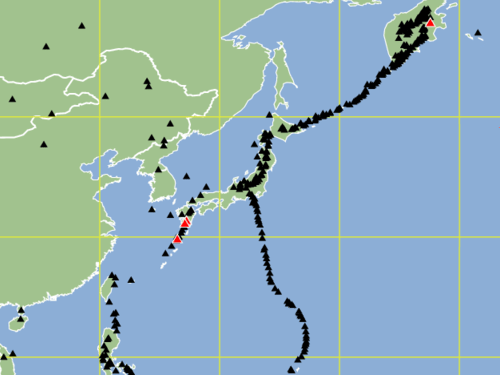 \
    \
    _ Chaque groupement de zone doit doit justifier d'un grand nombre de sinistres (nécessaire pour une bonne modélisation)**

Donc on procède à la composition des groupes en essayant de respecter ce critère. 

## Code inspiré de celui de Damien

**Récuperation des coodornées des villes japonaises, utile pour le choix de formation de groupe**

In [31]:
#Web scraping some japanese cities coordinate to plot

url = "https://www.latlong.net/category/cities-111-15.html"

# Extract tables
dfs = pd.read_html(url)

In [32]:
dfs[-1]

,Place Name,Latitude,Longitude
0,"Nagoya, Chubu, Japan",35.183334,136.899994
1,"Kitakyushu, Fukuoka Prefecture, Japan",33.883331,130.883331
2,"Sendai, Miyagi Prefecture, Japan",38.268223,140.869415
3,"Hiroshima, Hirosima Prefecture, Japan",34.383331,132.449997
4,"Kawasaki, Kanagawa Prefecture, Japan",35.516666,139.699997
5,"Kyoto, Kyoto Prefecture, Japan",35.011665,135.768326
6,"Kobe, Hyogo, Japan",34.689999,135.195557
7,"Fukuoka, Fukuoka, Japan",33.583332,130.399994
8,"Sapporo, Hokkaido, Japan",43.066666,141.350006
9,"Osaka, Japan",34.672314,135.484802


In [36]:
# On simplifie la base
cities = dfs[0]
cities["city"] = cities["Place Name"].apply(lambda row: row.split(",")[0])
cities = cities.drop(["Place Name"], axis = 1)
cities.head()

,Latitude,Longitude,city
0,35.183334,136.899994,Nagoya
1,33.883331,130.883331,Kitakyushu
2,38.268223,140.869415,Sendai
3,34.383331,132.449997,Hiroshima
4,35.516666,139.699997,Kawasaki


\
**On veut visualiser sur la carte de Japon les villes, les eq ainsi que les potentiels decoupages à réaliser**

In [37]:
# fonction qui affiche un polygone sur une map
def draw_screen_poly( lats, lons, m, facecolor='red', alpha=.1):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(poly)

In [59]:
# fonction pour manipuler les visualisations sur la carte

def plot_map(data, var: str, grid=False, add_cities=False, show_poly=False, show_other=False):
    """val: column name of the variable to plot"""
    fig = plt.figure(figsize=(14, 14))
    #m = Basemap(projection='lcc', resolution=None, lat_1=35.5, lat_2=42, lat_0=38, lon_0=140, width=2.1E6, height=2.1E6,)
    m = Basemap(projection='cyl',llcrnrlat=28,urcrnrlat=48, 
                llcrnrlon=127,urcrnrlon=151)
    m.shadedrelief()
    xpt, ypt = m(data.long, data.lat)
    m.scatter(xpt, ypt, s = data[var].values, c = data[var].values)

    if grid:
        m.drawparallels(np.arange(int(29),int(49),1),labels=[1,0,0,0])
        m.drawmeridians(np.arange(int(128),int(153),1),labels=[0,0,0,1])

    if add_cities:
        xpt,ypt = m(cities.Longitude,cities.Latitude)
        # convert back to lat/lon
        #lonpt, latpt = m(xpt,ypt,inverse=True)
        m.plot(xpt,ypt,'rx')  # plot a blue dot there
        # put some text next to the dot, offset a little bit
        # (the offset is in map projection coordinates)
        #plt.text(xpt+100000,ypt+100000, cities.city)

    if show_poly:
        # polygon not defined in map coordinate
        lats = [30, 46, 46, 30]
        lons = [129, 129, 149, 149]
        
        # polygon in map coordinates
        #lats = np.linspace(30, 47, 40)
        #lons = np.linspace(129, 150, 40)
        draw_screen_poly(lats, lons, m)

    if show_other:
        # polygone haut gauche
        latsC = [34, 46, 46, 38,34]
        lonsC = [129, 129, 140, 138, 129]
        draw_screen_poly(latsC, lonsC, m, "peru", .4)

        # polygone nord japon
        latsD = [34, 37.5, 38, 46, 46, 45, 42, 41.5, 38, 35, 34]
        lonsD = [137, 137, 138, 140, 149, 149, 146, 142.5, 142, 141, 137]
        draw_screen_poly(latsD, lonsD, m, "greenyellow", .4)
        
        # polygone sud japon
        latsB = [34, 30, 30, 34,37.5]
        lonsB = [137, 131, 129, 129, 137]
        draw_screen_poly(latsB, lonsB, m, "cyan", .4)
        
        #polygone bas droite
        latsD = [36, 38, 41.5, 42,45,35, 30, 30, 34, 35]
        lonsD = [141, 142, 142.5, 146,149,145, 143, 131, 137, 141]
        draw_screen_poly(latsD, lonsD, m, "red", .4)

    plt.plot()

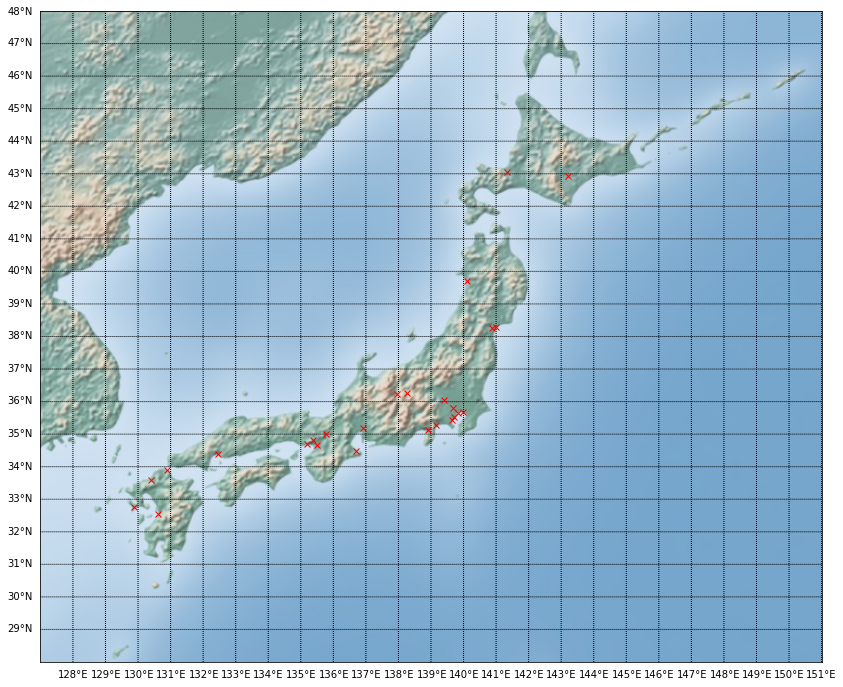

In [39]:
#Affichage des villes
plot_map(df_claims[df_claims['class']> 9], 'class', add_cities = True, grid = True)


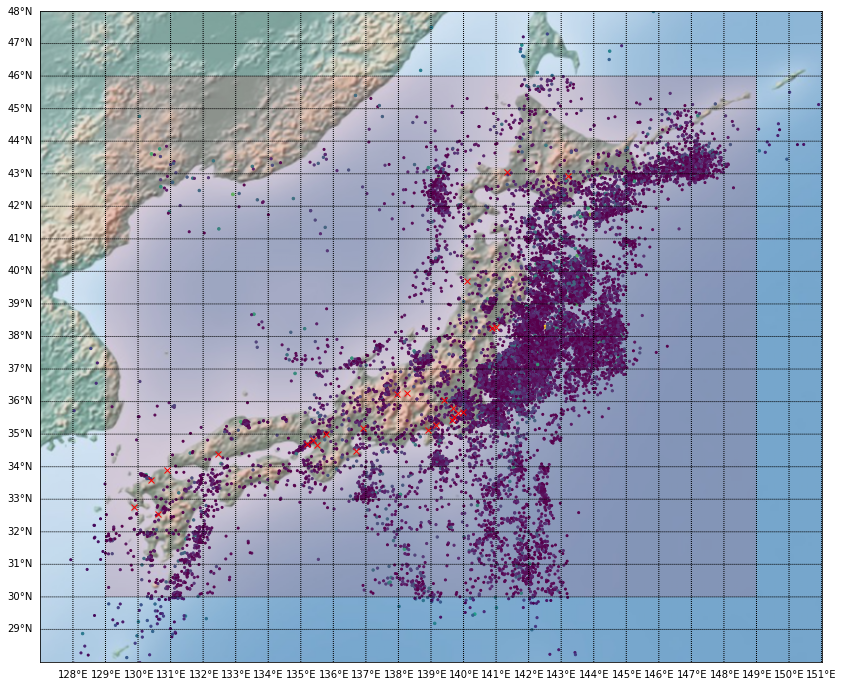

In [40]:
# affichage des eq + villes
plot_map(df_claims, "class", grid=True, add_cities=True, show_poly=True)

Pour un regroupement pertinent de zone, On decoupe selon la rapartition des sinistres, la localisation des villes et des failles sismiques.

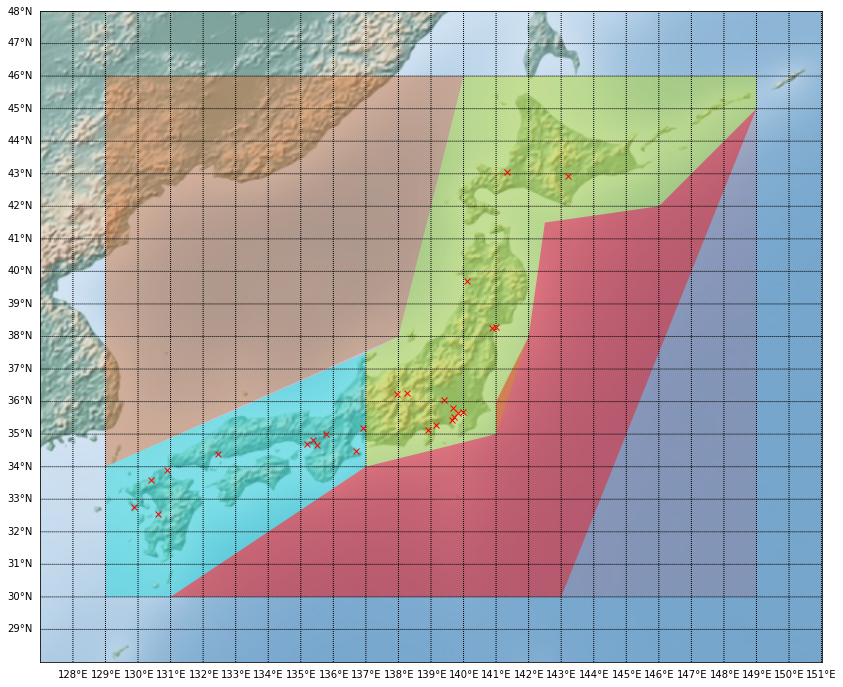

In [555]:
# Affichage ville et Plan de decoupage en groupe
plot_map(df_claims[df_claims['class']> 9], "class", grid=True, add_cities=True, show_poly=True, show_other=True)

**Formation des groupes selon le code couleur ci-dessous**

In [380]:
# Formation des groupes selon le code couleur ci-dessous

# groupe1 nord japon 
latslonsA = [(34,137), (37.5,137), (38, 138), (46,140), (46,149), (45,149), (42,146), (41.5,142.5),(38,142),(35,141), (34, 137)]
# groupe2 sud japon
latslonsB=[(34, 137), (30, 131), (30, 129), (37.5, 137)]
#groupe3 zone superieure japon
latslonsC = [(34,129) ,(46,129), (46,140), (38,140),(34,129)]
# groupe4 zone inferieure japon
latslonsD = [(36,141),(38,142),(41.5,142.5), (42,146), (45,149),(35,145),(30,143),(30,131),(34,137),(35,141)]

In [381]:
def to_group(x: float, y: float):
    
    polygonA = Polygon1(latslonsA)
    polygonB = Polygon1(latslonsB)
    polygonC = Polygon1(latslonsC)
    polygonD = Polygon1(latslonsD)

    if (polygonA.contains(Point(x,y))):
        return 'A'
    elif (polygonB.contains(Point(x,y))):
        return 'B'
    elif (polygonC.contains(Point(x,y))):
        return 'C'
    elif (polygonD.contains(Point(x,y))):
        return 'D'
    else :
        # si un point n'appartient pas à l'une des zones coloriées
        return 0

In [382]:
to_group(32, 146)

0

In [383]:
# On reinstreint qu'aux zones coloriées
df_claims = df_claims[(df_claims['long']>= 129) & (df_claims['long'] <= 149) & (df_claims['lat']>= 30) & (df_claims['lat'] < 46)]

# Constutition des groupes
df_claims['groupe']= df_claims.apply(lambda x: to_group(x['lat'], x['long']), axis=1)
df_claims.head()

<ipython-input-383-aa2528928886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claims['groupe']= df_claims.apply(lambda x: to_group(x['lat'], x['long']), axis=1)


,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,claims,groupe
46,46,1990,1,7,13,28,46.095,41.5917,142.0717,63.1,5.3,114,1,A
66,66,1990,1,10,3,9,14.010,39.6474,143.4717,3.4,5.5,155,1,D
67,67,1990,1,10,3,11,18.003,39.6074,143.3315,42.3,5.9,155,1,D
136,136,1990,1,20,2,55,55.045,40.1388,142.3889,52.6,5.0,134,1,D
214,214,1990,1,30,3,15,2.043,42.8477,145.4778,47.6,5.3,97,1,A


In [384]:
df_claims['groupe'].unique()

array(['A', 'D', 'B', 'C', 0], dtype=object)

In [385]:
#On supprime le groupe 0 pour obtenir notre jeu de donnée final
df_claims_final = df_claims[df_claims['groupe'] != 0]

In [386]:
df_claims_final['groupe'].unique()

array(['A', 'D', 'B', 'C'], dtype=object)

In [387]:
df_group = df_claims_final.groupby(['groupe']).count()
df_group.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,claims
groupe,,,,,,,,,,,,,
A,906,906,906,906,906,906,906,906,906,906,906,906,906
B,70,70,70,70,70,70,70,70,70,70,70,70,70
C,62,62,62,62,62,62,62,62,62,62,62,62,62
D,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253


On dispose d'un nombre d'observations suffisants pour une modelisation statistique. Toutefois, on dispose de peu de données pour les groupes B et C comparé aux autres zones. Ces zones connaissent des séismes moins violents.
Un explication serait la non significativité de presence de faille.

 ### ------> Modélisations

In [388]:
groupeA = df_claims_final[df_claims_final['groupe'] =='A']
groupeB = df_claims_final[df_claims_final['groupe'] =='B']
groupeC = df_claims_final[df_claims_final['groupe'] =='C']
groupeD = df_claims_final[df_claims_final['groupe'] =='D']


In [389]:
groupeA.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,claims,groupe
46,46,1990,1,7,13,28,46.095,41.5917,142.0717,63.1,5.3,114,1,A
214,214,1990,1,30,3,15,2.043,42.8477,145.4778,47.6,5.3,97,1,A
287,287,1990,2,11,17,46,7.017,36.4560,141.0175,52.5,5.3,213,1,A
359,359,1990,2,20,6,53,39.094,34.7172,139.2503,14.0,6.5,251,1,A
701,701,1990,4,11,7,53,36.054,42.4100,144.1167,65.3,5.6,96,1,A


In [390]:
def esti_params(data, dt: str, sse  = False):
    
    if (dt == 'date'):
        gr = data.groupby(['year','month','date']).count()
        gr.index = pd.to_datetime([f'{a}-{b}-{c}' for a, b, c in gr.index]) # conversion de l'index en date
        
    elif (dt == 'month'):
        gr = data.groupby(['year','month']).count()
        gr.index = pd.to_datetime([f'{a}-{b}' for a, b in gr.index]) #conversion de l'index en date
    elif (dt =='year'):
        gr = data.groupby(['year']).count()
        # pas besoin de convertir l'index
    else :
        return ("l'intervalle est soit 'year', soit 'month',soit 'date'")
    
    pmf=scipy.stats.poisson.rvs(mu=np.mean(gr['class']),size=len(gr.index))
    
    plt.figure(figsize=(12,8))
    plt.bar(gr.index,height= gr['class'],label="Données", width = 20)
    plt.bar(gr.index, pmf, label="Poisson",alpha=.5, width = 20)
    plt.legend(loc='upper right')
    plt.show()
    
    if sse:
        print('sse = ',np.sum((gr['class'] - pmf)**2))
        

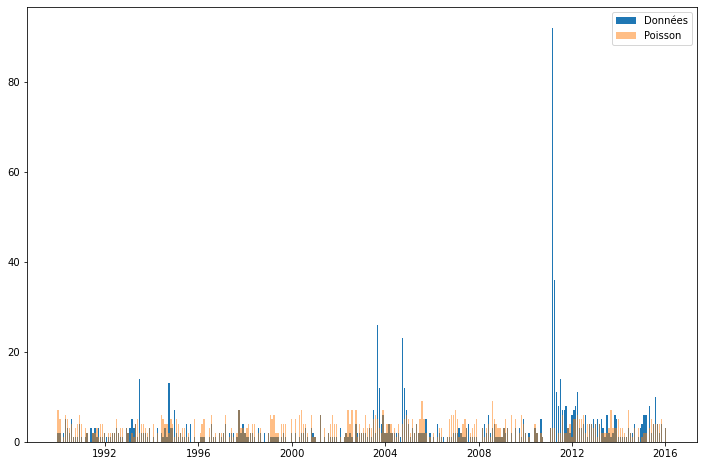

sse =  12146


In [391]:
 esti_params(groupeA, 'month', True)

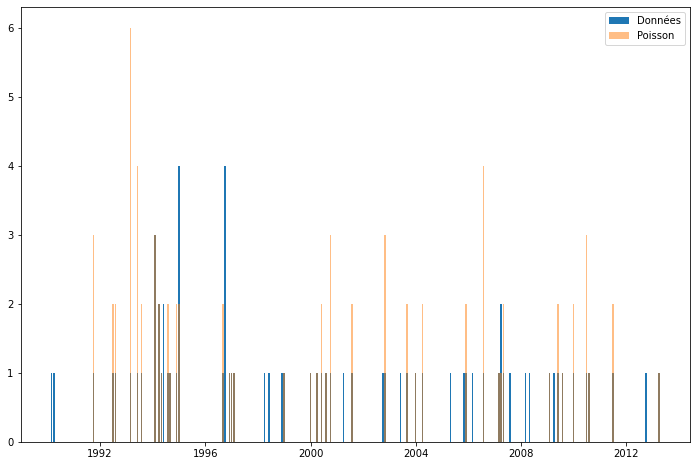

sse =  115


In [392]:
 esti_params(groupeB, 'month', True)

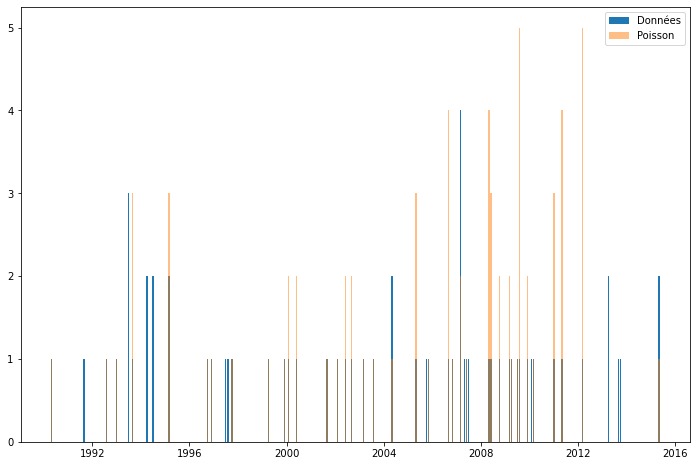

sse =  119


In [393]:
 esti_params(groupeC, 'month', True)

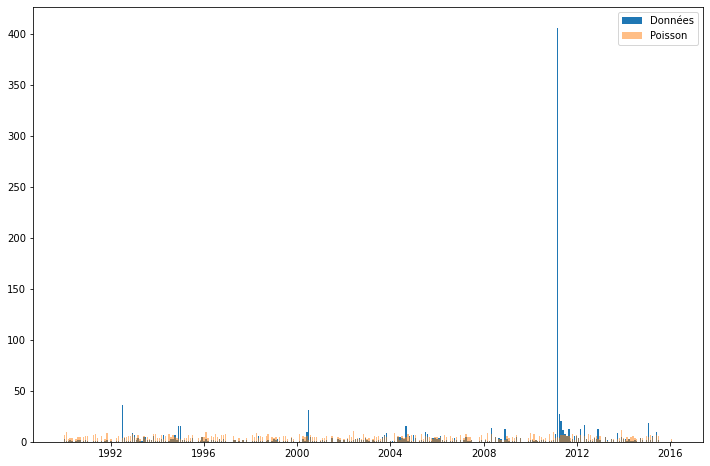

sse =  167551


In [394]:
 esti_params(groupeD, 'month', True)

La loi de poisson n'arrive pas à capter toutes les variations de nos données
une alternative serait une loi de comptage qui permet de mesurer la sur-dispersion. Un candidat est la loi binomiale négative, en particulier dans sa paramétrisation alternative décrite plus haut, est une alternative intéressante à la loi de Poisson. Elle est particulièrement utile pour des données discrètes, à valeurs dans un ensemble positif non-borné, dont la variance empirique excède la moyenne empirique. Si une Poisson est utilisée pour modéliser de telles données, la moyenne et la variance doivent être égales. Dans ce cas, les observations sont «sur-dispersées» par rapport au modèle Poisson. Puisque la loi binomiale négative possède un paramètre supplémentaire, il peut être utilisé pour ajuster la variance indépendamment de la moyenne. 
Cependant, il n'existe pas d'estimateurs simples et efficaces pour ces paramètres. Les estimateurs comportent beaucoup de biais et sont beaucoup sensibles à l'échantillonnage des données. 
Ce qui nous oblige à passer par un modèle de regression afin de modeliser la frequence de nos variables cible

 \

 \

## Negative binomial regression

In [395]:
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.formula.api import glm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

### Splitting to train and test sets

In [396]:
df = groupeA.groupby(['zone','year','month','date'], as_index = False)
#df = groupeB.groupby(['zone','year','month','date'], as_index = False)
#df = groupeC.groupby(['zone','year','month','date'], as_index = False)
#df = groupeD.groupby(['zone','year','month','date'], as_index = False)
#df_zone = df.count().drop(['year','month','date','depth','class','groupe', 'Unnamed: 0','hour', 'minute','seconds','lat','long'], axis = 1)

df_zone['magnitude'] = df.max()['class'] # on recupère le max de magnitude dans chaque zone
df_zone['depth'] = df.max()['depth'] # le max de la profondeur
df_zone['lat'] = df.median()['lat']
df_zone['long'] = df.median()['long']
df_zone.head()

,zone,claims,magnitude,depth,lat,long
0,60,1,6.0,294.5,45.7031,141.9403
1,60,1,5.2,21.2,45.8912,141.8773
2,79,1,6.3,313.9,45.6671,142.2935
3,79,1,5.3,325.7,45.7539,142.7106
4,79,1,5.7,306.6,45.7110,142.1738


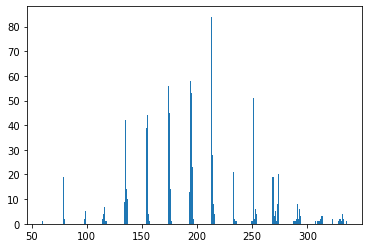

In [397]:
plt.bar(df_zone.zone, height = df_zone.claims)
plt.show()

In [409]:

mask = np.random.rand(len(df_zone)) < 0.8

df_train = df_zone[mask]
df_test = df_zone[~mask]
print(df_train. shape)
(647, 65)
df_test. shape

(4168, 6)


(1069, 6)

In [399]:
df_train.head()

,zone,claims,magnitude,depth,lat,long
0,60,1,6.0,294.5,45.7031,141.9403
2,79,1,6.3,313.9,45.6671,142.2935
3,79,1,5.3,325.7,45.7539,142.7106
4,79,1,5.7,306.6,45.7110,142.1738
5,79,1,5.4,304.4,45.6597,142.0029


In [400]:
# Variables

expr = """ claims ~  depth + magnitude + zone """
 

In [401]:
y_train, X_train = dmatrices(expr, df_train, return_type = 'dataframe')

y_test, X_test = dmatrices(expr, df_test, return_type = 'dataframe')

In [402]:
# Regression

nb_training_results = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = 1)).fit()

print(nb_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 claims   No. Observations:                  629
Model:                            GLM   Df Residuals:                      625
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1044.3
Date:                Fri, 15 Apr 2022   Deviance:                       161.26
Time:                        17:34:04   Pearson chi2:                     691.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5286      0.740      0.714      0.4

In [403]:
#Use the model to predict y's of the train set
nb_prediction_train = nb_training_results.get_prediction(X_train)

nb_summary_frame_train = nb_prediction_train.summary_frame()

print(nb_summary_frame_train)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    1.820992  0.444546       1.128522       2.938365
2    1.942557  0.498776       1.174403       3.213144
3    2.250447  0.548806       1.395373       3.629506
4    2.059210  0.475703       1.309371       3.238460
5    2.126552  0.481006       1.365030       3.312911
..        ...       ...            ...            ...
762  1.459724  0.119684       1.243024       1.714200
763  1.508885  0.117878       1.294666       1.758548
764  1.674941  0.141170       1.419898       1.975796
765  1.725380  0.244471       1.307004       2.277680
766  1.604523  0.126820       1.374256       1.873372

[629 rows x 4 columns]


In [404]:
predicted_counts = nb_summary_frame_train['mean']
predicted_counts


#Accuracy of the train set

print("R-square of train set: ", round(r2_score(y_train, predicted_counts)*100, 2), "%")

R-square of train set:  0.7 %


In [405]:
#test

In [406]:
nb_prediction_test = nb_training_results.get_prediction(X_test)

nb_summary_frame_test = nb_prediction_test.summary_frame()

print(nb_summary_frame_test)

         mean   mean_se  mean_ci_lower  mean_ci_upper
1    1.136626  0.240195       0.751173       1.719870
8    2.109472  0.440824       1.400539       3.177257
10   1.442276  0.183725       1.123616       1.851309
15   1.200719  0.208552       0.854274       1.687663
16   1.717694  0.323541       1.187450       2.484713
..        ...       ...            ...            ...
721  1.654280  0.135837       1.408364       1.943135
726  1.507759  0.126861       1.278537       1.778078
735  1.473710  0.106896       1.278409       1.698846
739  1.366109  0.106669       1.172253       1.592022
750  1.518533  0.115775       1.307758       1.763279

[138 rows x 4 columns]


In [407]:
predicted_counts = nb_summary_frame_test['mean']

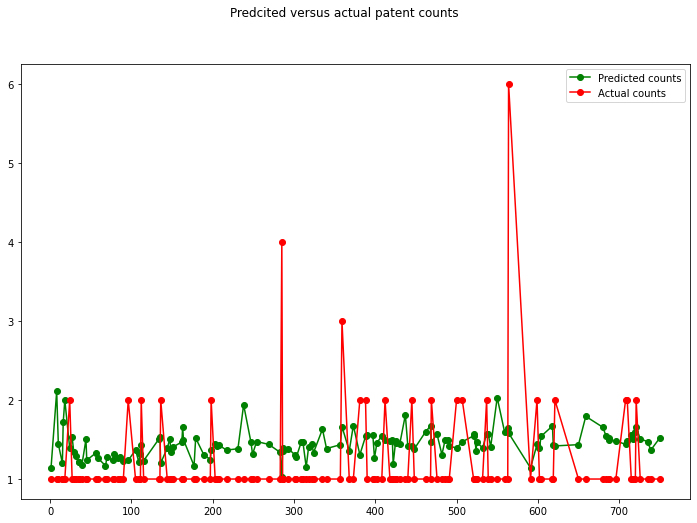

In [408]:
fig = plt.figure(figsize = (12, 8))

fig.suptitle('Predcited versus actual patent counts')

predicted, = plt.plot(X_test.index, predicted_counts , 'go-', label = 'Predicted counts')
actual, = plt.plot(X_test.index, y_test , 'ro-', label = 'Actual counts')


plt.legend(handles = [predicted, actual])
plt.show()